In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [22]:
# Importing necessary libraries ,as first we take dataset from kagglehub and copy that here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob as gb
import cv2  # if on local system  use pip install to import all libarary

In [21]:
train ='/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [24]:
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,         # Randomly rotate images by up to 90 degrees
    width_shift_range=0.0,     # No horizontal shift in images
    height_shift_range=0.0,    # No vertical shift in images
    shear_range=0.0,           # No shearing transformations
    zoom_range=0.0,            # No zooming applied
    horizontal_flip=True,      # Randomly flip images horizontally
    vertical_flip=True,        # Randomly flip images vertically
    rescale=1./255,            # Normalize pixel values to [0,1] by dividing by 255
    preprocessing_function=None,  # No additional preprocessing function applied
    validation_split=0.1        # Use 10% of data for validation
).flow_from_directory(
    train,                     # Path to the training dataset directory
    target_size=(size, size),   # Resize images to (224, 224)
    batch_size=64,              # Load images in batches of 64
    class_mode='categorical',   # Use categorical labels (for multi-class classification)
    color_mode='rgb',           # Load images in RGB format
    subset='training',          # Load only the training subset (90% of data)
    shuffle=True                # Shuffle the images for better model training
)

Found 63282 images belonging to 38 classes.


In [25]:

train_generator.class_indices #Python dictionary that maps each class name (folder name) to a numerical label. This mapping is automatically assigned when using flow_from_directory().

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

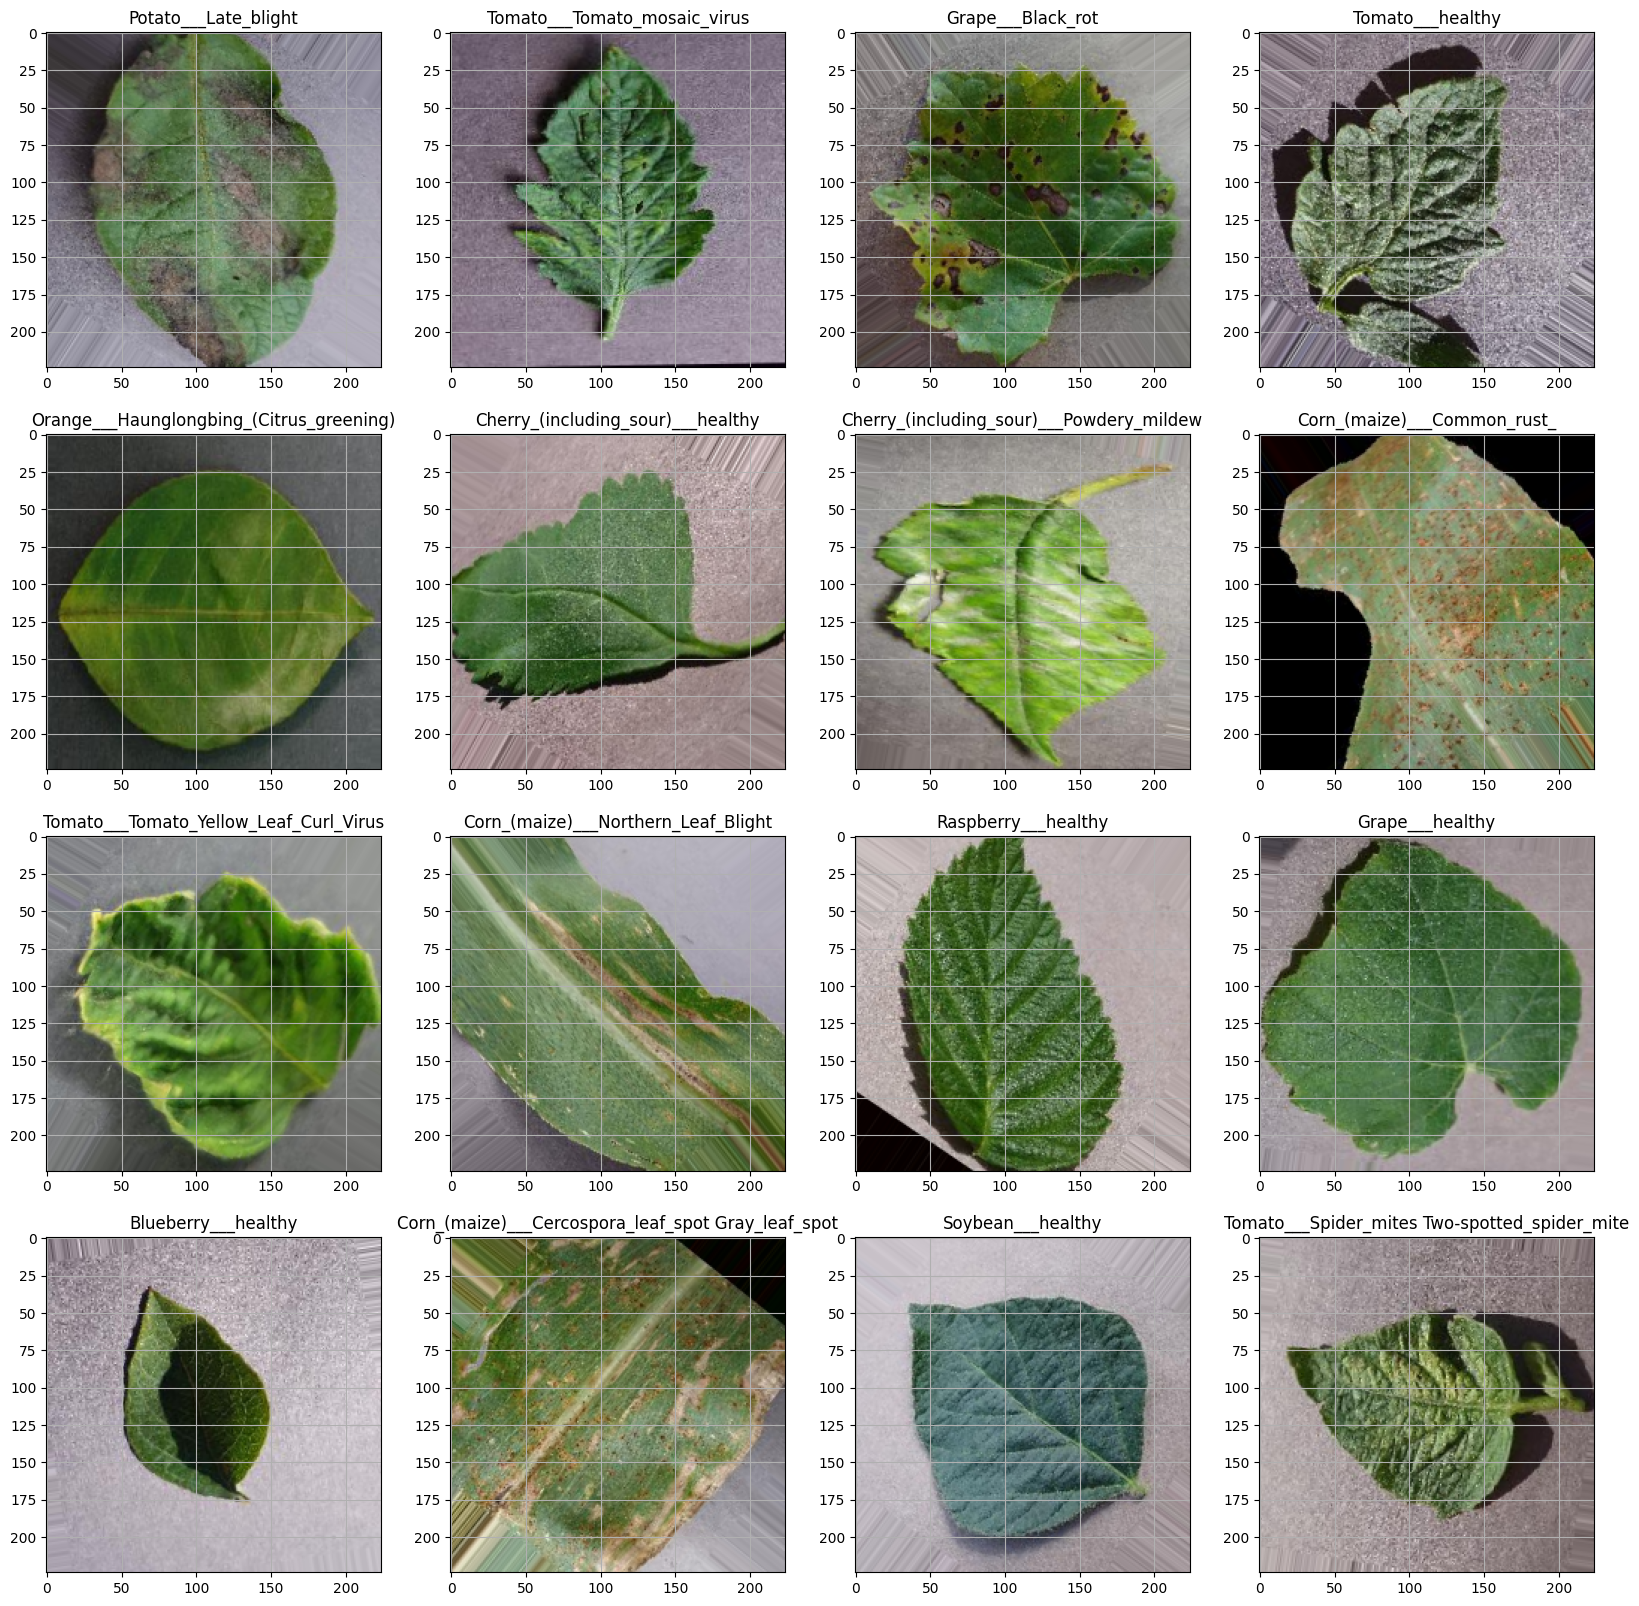

In [26]:
# Display some images
#(This code visualizes a batch of images from train_generator along with their corresponding class labels.)
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
  for i in range(0, 16):
    plt.subplot(4, 4, i+1)  # Arrange images in a 4x4 grid
    plt.imshow(X_batch[i])  # Display the image
    plt.title(classes[np.where(y_batch[i] == 1)[0][0]])  # Find the class index and get the class name
    plt.grid(None)  # Remove grid lines
  plt.show()
  break

In [27]:
valid = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
    # instant of above train replaice it by valid and all are same

In [28]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,  # Normalize pixel values (0-255 → 0-1)
    preprocessing_function=None,
    validation_split=0.1  # Use 10% of the dataset for validation
).flow_from_directory(
    valid,
    batch_size=164,
    target_size=(size, size),  # Resize images to (224, 224)
    class_mode='categorical',  # Multi-class classification
    color_mode='rgb',  # Load images in RGB format
    subset='validation',  # Select the validation subset
    shuffle=False  # Do not shuffle (useful for evaluation)
)


Found 1742 images belonging to 38 classes.


In [29]:
test = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,  # Normalize pixel values (0-255 → 0-1)
    preprocessing_function=None
).flow_from_directory(
    test,
    batch_size=164,
    target_size=(224, 224),  # Resize images to (224, 224)
    color_mode='rgb',  # Load images in RGB format
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # Keep order fixed for evaluation
)


Found 17572 images belonging to 38 classes.


In [30]:
test_generator.class_indices
#returns a dictionary mapping class names to integer labels.

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [31]:
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1, padding='same',
                              activation='relu', name="Conv1", input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding='same',
                              activation='relu', name='Conv2'))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same',
                              activation='relu', name='Conv3'))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same',
                              activation='relu', name='Conv4'))

model.add(keras.layers.Flatten(name='Flatten1'))

model.add(keras.layers.Dense(128, activation='relu', name='Dense1'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64, activation='relu', name='Dense2'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38, activation='softmax', name='Output'))

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras',  monitor='val_loss', save_best_only=True)
model_ReduceLRonPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)
callbacks = [early_stopping, model_checkpoint, model_ReduceLRonPlateau]


In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])

In [35]:
history = model.fit(train_generator, epochs=5, validation_data=valid_generator, callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 946s 939ms/step - accuracy: 0.2798 - loss: 2.6419 - precision: 0.6594 - recall: 0.1394 - val_accuracy: 0.6636 - val_loss: 1.0918 - val_precision: 0.7750 - val_recall: 0.5735 - learning_rate: 0.0010
Epoch 2/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 885s 894ms/step - accuracy: 0.7198 - loss: 0.8763 - precision: 0.8216 - recall: 0.6335 - val_accuracy: 0.8197 - val_loss: 0.6182 - val_precision: 0.8568 - val_recall: 0.7796 - learning_rate: 0.0010
Epoch 3/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 916s 888ms/step - accuracy: 0.8365 - loss: 0.5034 - precision: 0.8793 - recall: 0.7976 - val_accuracy: 0.8479 - val_loss: 0.4676 - val_precision: 0.8785 - val_recall: 0.8215 - learning_rate: 0.0010
Epoch 4/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 867s 876ms/step - accuracy: 0.8864 - loss: 0.3463 - precision: 0.9119 - recall: 0.8664 - val_accuracy: 0.8318 - val_loss: 0.5102 - val_precision: 0.8686 - val_recall: 0.8083 - learning_rate: 0.0010
Epoch 5/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 878s 888ms/st

In [36]:
import seaborn as sns  # Importing Seaborn for visualization

# Extracting accuracy values from the training history
acc = history.history['accuracy']  # Training accuracy over epochs
val_acc = history.history['val_accuracy']  # Validation accuracy over epochs

# Extracting precision values from the training history
precision = history.history['precision']  # Training precision over epochs
val_precision = history.history['val_precision']  # Validation precision over epochs

# Extracting recall values from the training history
recall = history.history['recall']  # Training recall over epochs
val_recall = history.history['val_recall']  # Validation recall over epochs

# Extracting loss values from the training history
loss = history.history['loss']  # Training loss over epochs
val_loss = history.history['val_loss']  # Validation loss over epochs

# Creating a range of epoch numbers
epochs = range(1, len(loss) + 1)  # Number of epochs used in training


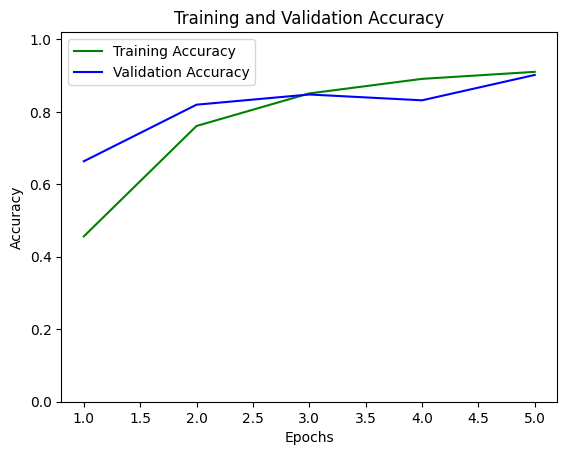

In [37]:

plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1.02)
plt.show()

In [38]:
model_evaluate = model.evaluate(test_generator)
print("loss:", model_evaluate[0])
print("accuracy:", model_evaluate[1])
print("precision:", model_evaluate[2])
print("recall:", model_evaluate[3])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 44s 409ms/step - accuracy: 0.9063 - loss: 0.2896 - precision: 0.9224 - recall: 0.8959
loss: 0.2791959047317505
accuracy: 0.9066128134727478
precision: 0.9235878586769104
recall: 0.894206702709198


In [40]:
# save the model is very important
model.save('cnn_model.keras')